* 마이캠퍼스 한대희 , daehee@mycampus.io, 010-2101-0255
* 데이터분석/인공지능을 위한 딥러닝 스쿨 --> http://bit.ly/2TXlJJ4

### 수학통계적 방법으로 선형회귀(linear regression) 풀기

##### Linear Regression  - 다항변수 고려하여 구현. 함수로 정의
일차함수의 기울기 및 Y절편을 행렬식으로 구할 수 있다.
numpy를 이용하여 행렬 및 선형대수(linear algebra) 방식으로 계산한다.
일자: 2018/01
저자: 한대희 daehee@mycampus.io

In [0]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [3]:
x = np.array([[10,20,30], [40,50,60]])
y = np.array([[100], [200]])
print(np.append(x, y, axis=1))
np.ones((10,1))

[[ 10  20  30 100]
 [ 40  50  60 200]]


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

## scikit-learn의 LinearRegression()을 직접 만들어 보기



In [0]:
"""
scikit-learn의 LinearRegression()을 직접 만들어 보기
"""
def my_regrssion(X, Y, debug=False):  
  # X.shape[0] - 행의 갯수
  rows = X.shape[0]
  X = X.reshape((rows, -1)) # 1차원벡터인 경우, 행열로 변환
  Y = Y.reshape((rows, -1)) # 1차원벡터인 경우, 행열로 변환
  
  # bias 에 해당하는 [1,1,1, ..,1] 칼럼을 X에 추가한다.
  X = np.append(X, np.ones((rows, 1)), axis=1)
  if debug: print(X)
    
  xx = X.T.dot(X) # X*X  
  xx_inv = np.linalg.inv(xx)  # (X*X)^-1
  xy = X.T.dot(Y) # X*Y
  
  W = np.matmul(xx_inv, xy) # XY/XX
  if debug: print(xx_inv, xy)
  return W


In [14]:
income = [100,200,300,400,500] # 월수익
card = [30, 57, 76, 140, 197] # 카드사용금액
for x, y in zip(income, card):
    print('%4d = w * %3d + b * 1' % (y, x))

  30 = w * 100 + b * 1
  57 = w * 200 + b * 1
  76 = w * 300 + b * 1
 140 = w * 400 + b * 1
 197 = w * 500 + b * 1


In [0]:
X = np.array(income)
Y = np.array(card)


In [17]:
w = my_regrssion(X, Y, debug=True)
print('W', w)

[[100.   1.]
 [200.   1.]
 [300.   1.]
 [400.   1.]
 [500.   1.]]
[[ 1.0e-05 -3.0e-03]
 [-3.0e-03  1.1e+00]] [[191700.]
 [   500.]] [[  0.417]
 [-25.1  ]]
W [[  0.417]
 [-25.1  ]]


### Y' = W*X + B 로  regression

In [18]:
A = w[0]
B = w[1]
card_from_model = [A*x + B for x in income] 
print(card_from_model)

[array([16.6]), array([58.3]), array([100.]), array([141.7]), array([183.4])]


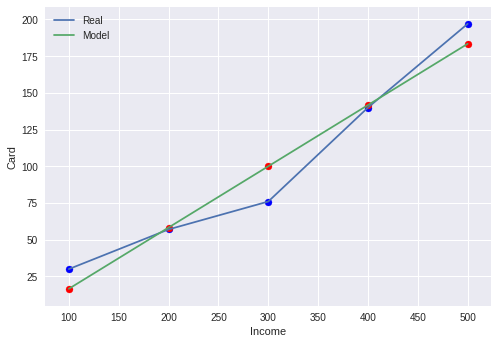

In [19]:
fig, ax = plt.subplots()
ax.plot(income, card, label='Real')
ax.plot(income, card_from_model, label='Model')
ax.scatter(income, card, c='blue')
ax.scatter(income, card_from_model, c='red')
ax.set_xlabel('Income')
ax.set_ylabel('Card')
plt.legend()
plt.show()

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def rmse(arr1, arr2):
    return np.sqrt(np.mean((arr1-arr2)**2))

def linear_reg(X, Y, name=''):  
  X = X.reshape((-1, 1))
  model = LinearRegression()
  model.fit(X, Y)
  # model.coef_ -- 기울기
  # model.intercept_ -- Y절편(bias)
  print('Model Parameters:', model.coef_, model.intercept_)
  Y2 = model.predict(X)
  rmse_v = rmse(Y, Y2)
  print("Mean squared error: %.2f"
      % mean_squared_error(Y, Y2))
  print('Variance score: %.2f' % r2_score(Y, Y2))
  print("RMSE of %s: %.2f" % (name, rmse_v))

In [22]:
linear_reg(X, Y, '0')


Model Parameters: [0.417] -25.099999999999966
Mean squared error: 189.02
Variance score: 0.95
RMSE of 0: 13.75


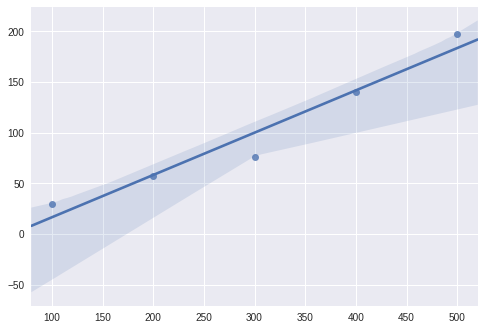

In [0]:
import seaborn as sns
sns.regplot(X[:, 0], Y.flatten())